<a href="https://colab.research.google.com/github/RodLunardi/predicciones_de_ventas_alimenticias/blob/main/predicciones_de_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
filename = "/content/sales_predictions(5).csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

filas 8523
columnas 12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


¿Cuáles son los tipos de datos en cada variable?

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [6]:
df.duplicated().sum()

0

Identifiquen los valores faltantes.

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
df.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [10]:
df['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'), inplace=True)

In [11]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [13]:
df[df.isnull().any(axis=1)]
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [14]:
df['Outlet_Size'][df['Outlet_Type']=='Grocery Store'].mode()[0]

'Small'

In [ ]:
#Hice el bucle For primero para dspues traspasarlo a la funcion lambda
#df
#df['Outlet_Size'][df['Outlet_Type']=='Grocery Store'].mode()[0]
#valor_arellenar = 0
#for i in range(len(df)):
#  if (pd.isnull(df.at[i, 'Outlet_Size'])):
#    df['Outlet_Size'][df['Outlet_Type']==df['Outlet_Type'][i]].mode()[0] = valor_arellenar
#df['Outlet_Size'].fillna(valor_arellenar, inplace=True)

In [15]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.fillna(x.mode()[0]))

Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

Para los valores faltantes de la columna 'Item_Weight' se aplicou la funcion fillna() combinada con la función groupby. ya que decidí rellenar los valores faltantes con el promedio del peso por el identificador. Para los valores faltantes de la columna 'Outlet_Size'. Considerando que la columna es categorica, para rellenar los valores faltantes se aplicou la funcion fillna() dentro de la función applay(lambda) combinada con la función groupby para rellenar con la moda() del tamaño del Outlet por el tipo de Outlet. Essa estrategia es para eliminar los valores nulos sin eliminar columnas o filas del dataframe. 

 Confirmen que no hay valores faltantes después de abordarlos.

In [16]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Las 4 filas que continuaron vacias despues de abordar los datos faltantes fueron eliminadas por reprentar una minima parte del dataframe 

In [17]:
df.dropna(subset=['Item_Weight'], inplace=True)

In [18]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [19]:
df.nunique()

Item_Identifier              1555
Item_Weight                   446
Item_Fat_Content                5
Item_Visibility              7876
Item_Type                      16
Item_MRP                     5936
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [23]:
df['Outlet_Establishment_Year'].value_counts()

1985    1459
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

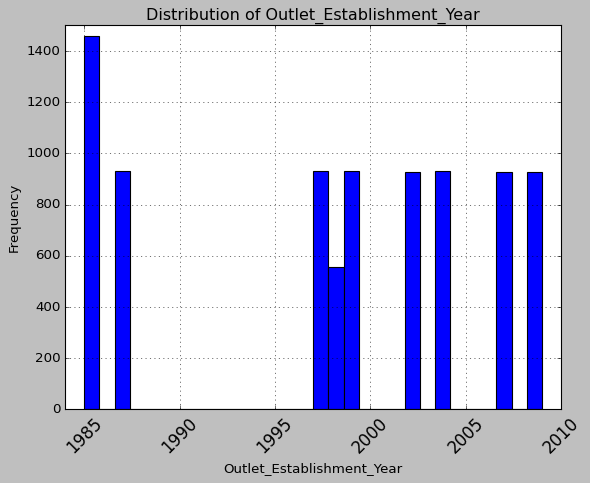

In [24]:
plt.style.use('classic')
df['Outlet_Establishment_Year'].hist(bins = 30, edgecolor='black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 45, fontsize=15)
plt.title('Distribution of Outlet_Establishment_Year')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Frequency')
plt.xlim(left=1984,right=2010)
plt.ylim(bottom=0,top=1500)
plt.show()

Grafico de Barras

In [25]:
sum_ventas = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().round(2)
sum_ventas

Item_Type
Baking Goods             1265404.83
Breads                    553237.19
Breakfast                 232298.95
Canned                   1444151.49
Dairy                    1519140.55
Frozen Foods             1824164.83
Fruits and Vegetables    2820059.82
Hard Drinks               457793.43
Health and Hygiene       1045200.14
Household                2055493.71
Meat                      917565.61
Others                    325517.61
Seafood                   148868.22
Snack Foods              2728351.86
Soft Drinks               892897.72
Starchy Foods             351401.25
Name: Item_Outlet_Sales, dtype: float64

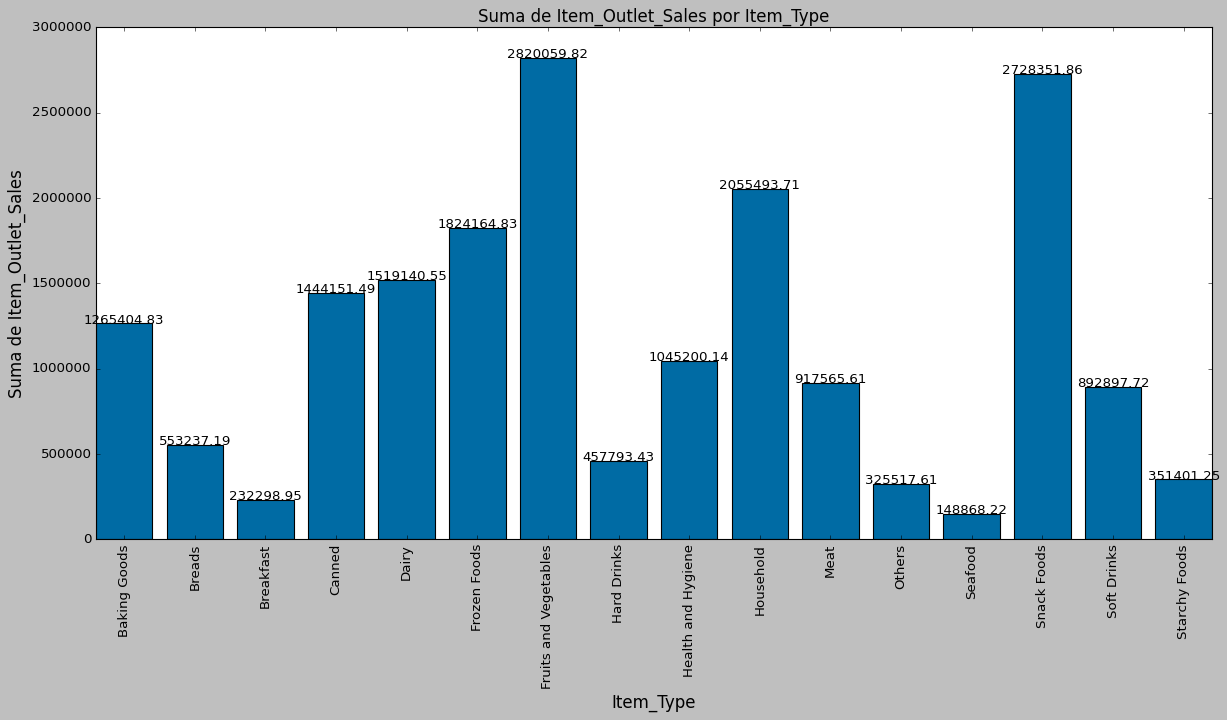

In [26]:
plt.style.use('tableau-colorblind10')
sum_ventas = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().round(2)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,8))
plt.bar(sum_ventas.index, sum_ventas.values)
for i, v in enumerate(sum_ventas.values):
    plt.text(i, v + 2, str(v), ha='center') 
# Etiquetar los ejes x e y y darle un título al gráfico
plt.xticks(rotation = 90)
plt.xlabel('Item_Type', fontsize=15)
plt.ylabel('Suma de Item_Outlet_Sales', fontsize=15)
plt.title('Suma de Item_Outlet_Sales por Item_Type', fontsize=15)
# Mostrar el gráfico
plt.show()

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

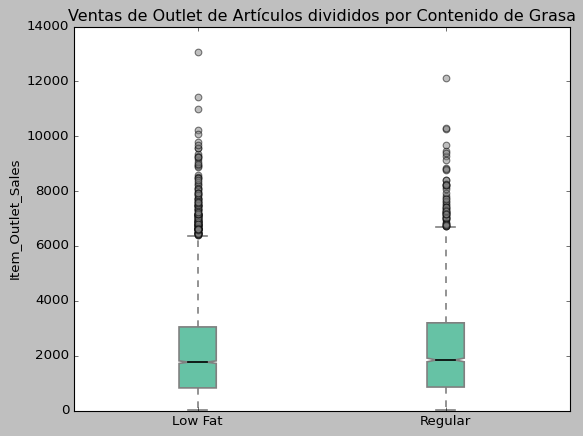

In [27]:
# Dividir los datos por valores de Item_Fat_Content
low_fat_data = df[df['Item_Fat_Content'] == 'Low Fat']['Item_Outlet_Sales']
regular_data = df[df['Item_Fat_Content'] == 'Regular']['Item_Outlet_Sales']
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))
# Crear el boxplot
# Configurar las propiedades del boxplot
bp = ax.boxplot([low_fat_data, regular_data], notch=True, patch_artist=True, 
                boxprops=dict(facecolor='#66c2a5', color='gray', linewidth=1.5), 
                whiskerprops=dict(color='gray', linewidth=1.5, linestyle='--'), 
                capprops=dict(color='gray', linewidth=1.5), 
                medianprops=dict(color='black', linewidth=1.5),
                flierprops=dict(marker='o', color='gray', alpha=0.5))
# Configurar los ejes y el título
ax.set_xticklabels(['Low Fat', 'Regular'])
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('Ventas de Outlet de Artículos divididos por Contenido de Grasa')
# Mostrar el gráfico
plt.show()

In [43]:
mean_filter = df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().round(2)
mean_filter

Outlet_Size
High      2299.00
Medium    2681.10
Small     1867.55
Name: Item_Outlet_Sales, dtype: float64

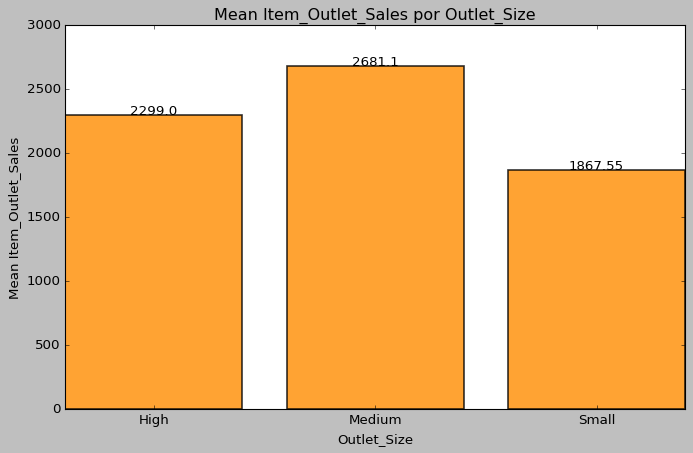

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('tableau-colorblind10')
plt.bar(mean_filter.index, mean_filter.values, color='#FF8C00', edgecolor='k', linewidth=1.5, alpha=0.8)
for i, v in enumerate(mean_filter.values):
    plt.text(i, v + 1, str(v), ha='center') # codigo para colocar montos correspondiente a las barras
ax.set_title('Mean Item_Outlet_Sales por Outlet_Size')
ax.set_xlabel('Outlet_Size')
ax.set_ylabel('Mean Item_Outlet_Sales')
plt.show()

Mapa de calor de la correlación entre las características.

<Axes: >

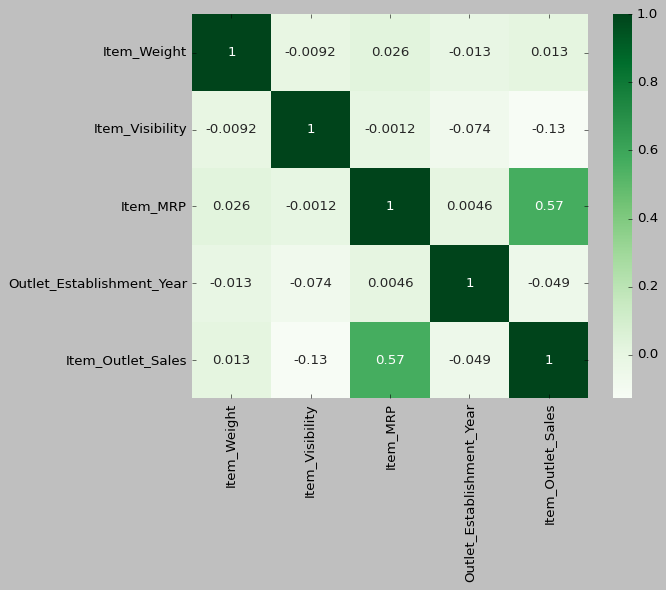

In [29]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)